<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp24-notes/blob/main/Day10_Introduction_to_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day10
## Introduction to Scikit Learn

#### CS167: Machine Learning, Spring 2024

Tuesday, March 4th, Spring 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_syllabus_sp24.pdf)

# Admin Stuff

You should be working on:
- [Notebook #4:](https://github.com/alimoorreza/CS167-SP24-Notebook-4)
    - Intro to Scikit Learn
    - **Due**: Friday, 03/15/24 by 11:59pm (you have 10 days)

# Introduction to Scikit Learn:

`scikit-learn` is one of Python's main Machine Learning Libraries.

_"It is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities."_

- built on `NumPy`, `SciPy`, and `matplotlib`
- plays nicely with `pandas`
- https://scikit-learn.org/stable/

# Overview of the Scikit Learn 'Algorithm':

When working in Scikit Learn (`sklearn`), there is a general pattern that we can follow to implement any supported machine learning algorithm.

It goes like this:
1. Load your data using `pd.read_csv()`
2. Split your data `train_test_split()`
3. Create your classifier/regressor object
4. Call `fit()` to train your model
5. Call `predict()` to get predictions
6. Call a metric function to measure the performance of your model.

## All together, it looks something like this:

In [3]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
path = '/content/drive/MyDrive/cs167_sp24/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

#2. split data
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))


# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("--------------------------------------------------------------")
print(f"{'ACTUAL':<{20}} {'PREDICTIONS':<{20}}")
for i in range(len(test_sln)):
    actual_sample     = test_sln.iloc[i]
    predicted_sample  = iris_predictions[i]
    print(f"{actual_sample:<{20}} {predicted_sample:<{20}}")

print("--------------------------------------------------------------")


#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))


Accuracy: 0.9
--------------------------------------------------------------
ACTUAL               PREDICTIONS         
Iris-virginica       Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     

# Now, let's go through step-by-step:

## Step 1: Import libraries and load your data

We should be pretty familiar with this one.
- mount your drive
- import any relevant libraires
- use `pd.read_csv()` to load in your dataset

In [8]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#0. import libraries
import sklearn
import pandas
from sklearn import tree # importing the Decision Tree machine learning model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors # importing the k-Nearest Neighbor machine learning model

#1. load data
path = '/content/drive/MyDrive/cs167_sp24/datasets/irisData.csv'
iris_data = pandas.read_csv(path)
iris_data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Split Data

Cross-Validation is an important step in machine learning which enables us to evaluate our models. To do this, we need to split our data into `train_data` and `test_data`.
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp24/notes/images/day04_cross_validation.png" width=600/>
</div>

Sklearn takes this a step futher and splits the data up into 4 pieces:

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp24/notes/images/day06_traintestsplit.png" width=600/>
</div>

- `train_data`: holds the predictor variables of the training set
- `train_sln`: holds the target variable of the training set
- `test_data`: holds the predictor variables of the testing set
- `test_sln`: holds the target varibles of the testing set

## Step 2: Splitting Data (the code)

In [14]:
#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
#predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

In [15]:
# take a look at the data... make sure you understand what split of data is stored in each
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

train_data.head()

train_data shape:  (120, 4)
test_data shape:  (30, 4)
train_sln shape:  (120,)
test_sln shape:  (30,)


,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


## Step 3: Create classifier/regressor object

The syntax/wording for this is going to come directly from the `sklearn` documentation.
- [Scikit Learn Decision Tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

The name of the model will change based on whether you are doing a __classification__ or __regression__.
- generally in the name:
    - `tree.DecicionTreeClassifier()`
    - `tree.DecisionTreeRegressor()`

In [21]:
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

## Step 4: Call `fit()` to train the model

Each machine learning model has a training process associated with it. Scikit learn makes it easy to train whatever model you choose by simply calling `fit()` on that model.

We generally pass two things into `fit()`:
- `train_data`: the predictor variables we want to train our model on
- `train_sln`: the labels for each training examples


In [22]:
dt.fit(train_data, train_sln)

DecisionTreeClassifier()

## Step 5: Call `predict()` to get predictions

After our model is trained, it's time to run our testing data through our model and see what the model predicts.

Scikit learn lets us do this in one line:
- we're saving what the function is returning as `predictions`
- passing in `test_data`, which is the data without labels that was not included in training

In [23]:
predictions = dt.predict(test_data)
print('predictions.shape: ', predictions.shape)
print(predictions)

predictions.shape:  (30,)
['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


# Step 6: Evaluate the Model

Now that we have some predictions, we need to check to see how close we were by passing our predictions and the actual correct answers into a metric function.

| **Type of ML** | **Metric**                | **Description**                                                                                       | Scikit Learn                                                                                                                                                            |
|----------------|---------------------------|:-------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Classification | Accuracy                  | Number correct examples divided by total number                                                       | [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)                                               |
| Classification | Confusion Matrix          | Detailed table of where our model got confused.                                                       | [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)          |
| Regression     | Mean Absolute Error (MAE) | The average absolute distance from the target variable                                                | [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) |
| Regression     | Mean Squared Error (MSE)  | The average squared distance from the target variable                                                 | [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)    |
| Regression     | $R^2$                     | 1: perfectly fit data 0: same performance as guessing the mean of the target variable -1: really bad. | [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)                                  |

Available metrics can be found in the sklearn documentation [[sklearn metrics]](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [24]:
from sklearn import metrics
#6. call a metric function to evaluate the model
print("Accuracy:", metrics.accuracy_score(test_sln, predictions))

Accuracy: 0.8333333333333334


### Here's an example of displaying a confusion matrix:

Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=iris_labels)
print(conf_mat)

[[9 0 0]
 [0 8 3]
 [0 2 8]]


                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0                8               3
Iris-virginica             0                2               8


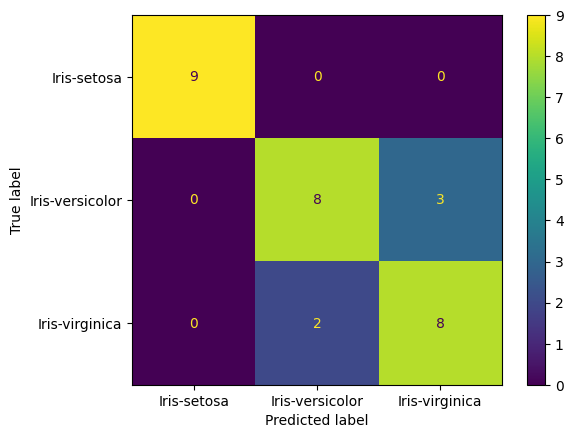

In [26]:
#displaying a confusion matrix

# option #1: text
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

# option #2: prettify
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris_labels)
displ.plot()
plt.show()

## (Optional) Step 7: Print out the results to debug

Sometimes its helpful to take a closer look at your predictions. Here's some code to do just that:

In [29]:
# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("--------------------------------------------------------------")
print(f"{'ACTUAL':<{20}} {'PREDICTIONS':<{20}}")
for i in range(len(test_sln)):
    actual_sample     = test_sln.iloc[i]
    predicted_sample  = iris_predictions[i]
    print(f"{actual_sample:<{20}} {predicted_sample:<{20}}")

print("--------------------------------------------------------------")

--------------------------------------------------------------
ACTUAL               PREDICTIONS         
Iris-virginica       Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-virginic

# 💬 Group Exercise #1:

Take a look at the [Decision Tree Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):
- Experiment with different `random_state`s
- Explore different parameters you could use in the `DecisionTreeClassifier`
- Can you improve the accuracy with `random_state=41`?
- What happens when you do this? Why?

# Plotting Decision Trees

You can use `matplotlib` to plot decision trees using the `sklearn.tree.plot_tree` method.

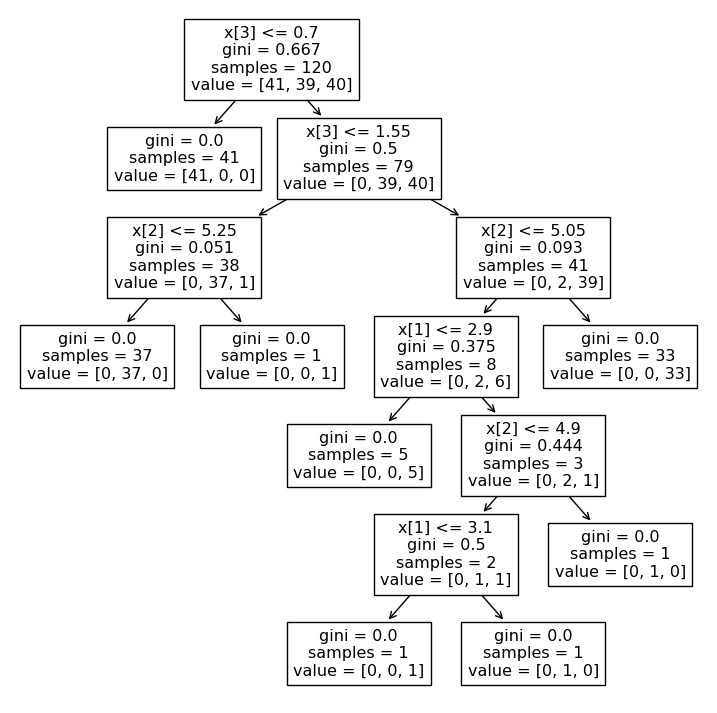

In [ ]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9)) # Makes it so the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree

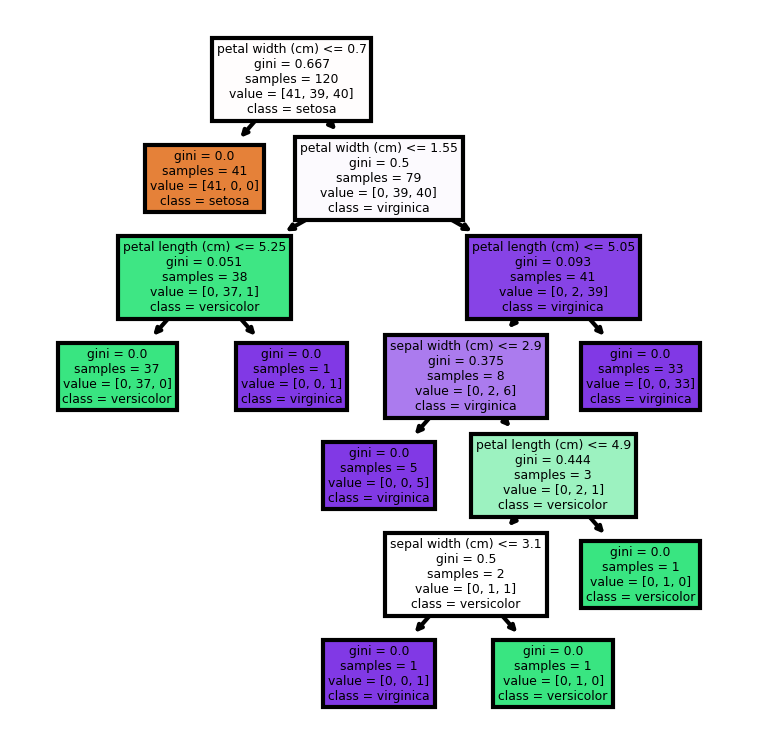

In [ ]:
#tweak paramters to make it pretty
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dt,
               feature_names = fn,
               class_names=cn,
               filled = True);

## Another pretty Confusion Matrix

Text(0.5, 0, 'Predicted label')

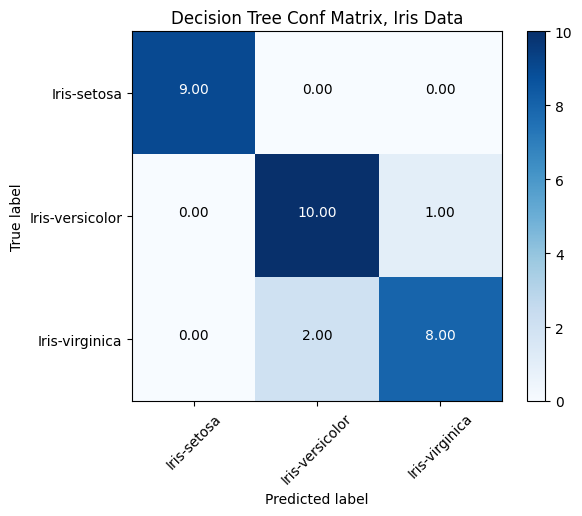

In [ ]:
# a pretty confusion matrix
import itertools

cm=metrics.confusion_matrix(test_sln,predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Conf Matrix, Iris Data')
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation=45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Normalizing using `StandardScaler`

**Documentation**: [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

- Standardize features by removing the mean and scaling to unit variance.
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using __transform__.


In [ ]:
train_data.head()

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data) # computes the mean and std to be used for later scaling
train_data_normalized = scaler.transform(train_data) # performs standardization by centering and scaling on the training features
test_data_normalized = scaler.transform(test_data) # performs standardization by centering and scaling on the testing features
train_data_normalized

array([[-0.18688501, -1.09883199, -0.14183598, -0.25284018],
       [ 0.77252466, -0.6472572 ,  0.47403077,  0.39546797],
       [-1.14629467, -1.32461939,  0.41804288,  0.65479123],
       [-0.42673742, -1.09883199,  0.362055  ,  0.00648308],
       [ 1.01237707, -0.19568241,  0.80995808,  1.43276101],
       [-0.0669588 ,  2.06219154, -1.42955736, -1.29013322],
       [ 1.25222949,  0.03010499,  0.7539702 ,  1.43276101],
       [ 0.65259845,  0.25589238,  0.41804288,  0.39546797],
       [ 1.25222949,  0.03010499,  0.92193386,  1.17343775],
       [ 0.05296741,  0.25589238,  0.58600654,  0.78445286],
       [ 0.41274603, -0.4214698 ,  0.30606711,  0.13614471],
       [-0.18688501, -0.6472572 ,  0.41804288,  0.13614471],
       [-0.78651605,  2.28797894, -1.2615937 , -1.41979485],
       [ 0.77252466, -0.19568241,  1.1458854 ,  1.30309938],
       [ 0.53267224,  0.70746717,  1.03390963,  1.56242264],
       [-0.18688501,  1.61061675, -1.14961793, -1.16047159],
       [ 1.01237707, -1.

# 💬 Group Exercise #2:

With the aid of the [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.htm) documentation, try the following:
- Create a decision tree with an early stopping parameter
- Visualize your trees to see if it is working right.
- Look at your performance metrics to see how it changes performance.
- Determine which of the features (petal length, sepal length, etc) were the most important.How does it determine these numbers?

# 💬 Group Exercise #3:

Check out the [scikit-learn documentation here](https://scikit-learn.org/stable/modules/classes.html)

Find the documentation for the kNN classifier (i.e., the classifier, not an unsupervised algorithm). Answer the following questions:

- What is the default value of k it uses?
- Does it do weighted or unweighted kNN by default?
- What is the accuracy on the Iris dataset for k = 100, both weighted and unweighted?
- How do the weighted and unweighted versions do for small values of k?

# Let's try regression now:

Using the `vehicles.csv` dataset, let's try out sklearn with regression:
- load the data, get the right subset
- set predictors and target variables
- use `train_test_split()` to split the data

In [32]:
# load in the vehicles.csv data for scikit learn
import pandas
import numpy

# load data, get the right subset
path = '/content/drive/MyDrive/cs167_sp24/datasets/vehicles.csv'
data = pandas.read_csv(path)
gas_vehicles = data[data['fuelType']=='Regular'][['year', 'cylinders', 'displ', 'comb08']]
gas_vehicles.dropna(inplace=True)

# set the predictor variables and target variable
predictors= ['year', 'cylinders', 'displ']
target= 'comb08'

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = train_test_split(gas_vehicles[predictors], gas_vehicles[target], test_size = 0.2, random_state=41)
train_data.head()

<ipython-input-32-23a9041fd6cb>:7: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv(path)


,year,cylinders,displ
4256,1985,4.0,2.2
2685,1995,6.0,4.0
35058,2020,6.0,4.3
10678,1986,6.0,2.8
18702,1984,8.0,5.0


And then we do the next steps:
- build our model using `neighbors.KNeighborsRegressor()`
- fit our model using `fit()` and passing in `train_data` and `train_sln`
- get our predictions by calling `predict()`
- evaluate our predictions using `metrics.mean_squared_error()`, and `metrics.r2_score()`

In [ ]:
from sklearn import neighbors
# create our model

# fit (train) the model to the data

# use the trained model to get predictions from our test_data

# use a metric to see how good our predictions are


# 💬 Group Exercise #4:
Look up an appropriate Decision Tree algorithm and apply it to the vehicles data:
- https://scikit-learn.org/stable/modules/classes.html
- Using Default values of the decision tree, what is the $R^2$ metric?
- Interpret the $R^2$ value... is it good or bad?

# 💬 Group Exercise #5:
Change your decision tree to have a `max_depth` of 3.
- does this help or hurt the decision tree performance?

Compare your decision tree to a kNN algorithm:
- what values of k seem to help the performance?
- What else can you do to help the performance?

Can you get a higher $R^2$ valuue using a knn algorithm or a decision tree?
- what does this indicate about the data?